In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install arch -q
import arch as arc

### Notes
Time series intervals are constant, can change frequency based on drill down or roll up needs

In [2]:
raw_data = pd.read_csv('Index2018.csv')
#copy of data
raw_data_comp = raw_data.copy()

In [3]:
raw_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
raw_data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [5]:
raw_data.isna().sum()
#see if any field has a missing value

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Plot the data
- Each item is graphed separately to see how it changes over time  
- S&P looks like its more flat but the two actually change the same so a superimposed graph might be misleading. This is why time series is important

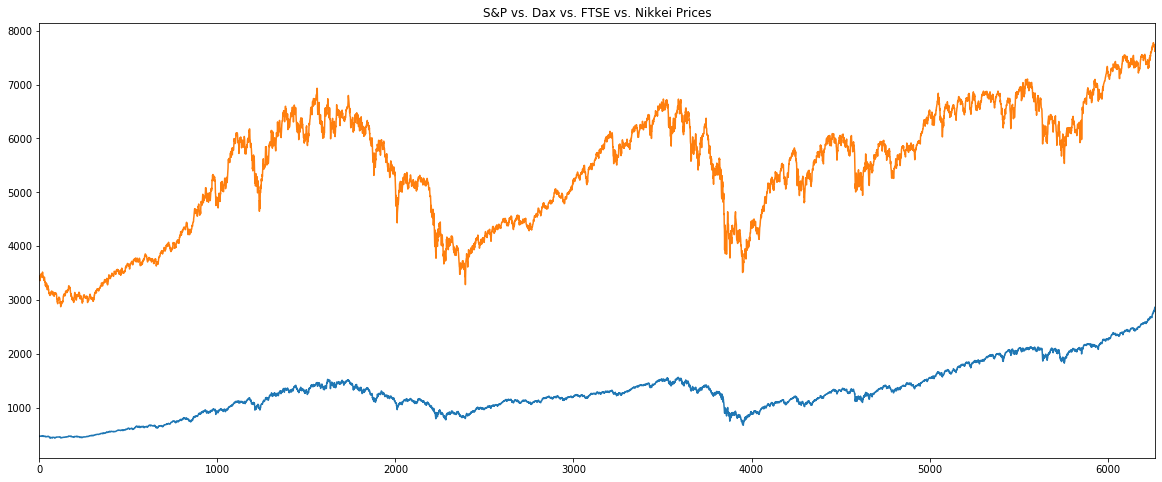

In [6]:
raw_data.spx.plot(figsize=(20,8),title="S&P Prices")
#raw_data.dax.plot(figsize=(20,8),title="Dax Prices")
raw_data.ftse.plot(figsize=(20,8),title="FTSE Prices")
#raw_data.nikkei.plot(figsize=(20,8), title = "Nikkei Prices")
plt.title("S&P vs. Dax vs. FTSE vs. Nikkei Prices")
plt.show()

Now to see the density of the data and which values are more likely to occur == QQPlot!
QQPlot = showcases how data fits a normal distribution

In [7]:
import scipy.stats
import pylab

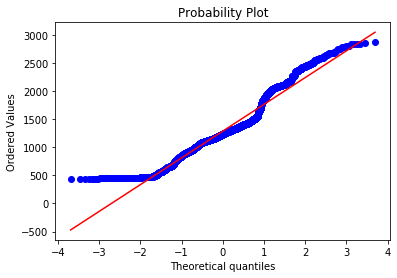

In [8]:
scipy.stats.probplot(raw_data.spx,plot=pylab)
pylab.show()
#y = prices
#x = theoretical quantiles of the dataset/how many standard deviations from the mean the data falls under

**Note:** most data falls in the 500 price range. That means this dataset is not normally distributed.

## Transforming Dataset into Time Series

In [9]:
#dealing with transforming the date
raw_data.date.describe()

count           6269
unique          6269
top       12/05/1994
freq               1
Name: date, dtype: object

Top date is randomly displayed. Its arbitrary. If there is a date value, python counts it as not null so it computes a binary of 1 if not null and 0 otherwise so it doesnt have meaning. We need to tranform the date field so that it is meaningful for analysis using pandas

In [10]:
#transform date field
raw_data.date = pd.to_datetime(raw_data.date, dayfirst = True)

In [11]:
raw_data.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [12]:
raw_data.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

**Transformed date will now be used as an index for the time series because eahc value in a time series needs to correspond with a specific time period**
- Here, we will use the day as our frequency for time so we can convert the date field to index using a pandas method

In [13]:
raw_data.set_index("date", inplace=True)
raw_data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


Note: our data needs to have a constant frequency to be a time series. So thats what we address below using pandas asfreq method

In [14]:
#h=hourly, d=day,w=week, m=month, a=year/annual
raw_data = raw_data.asfreq("d")
raw_data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


### Handling Missing Values
The frequency is set from the first available date. Note, where there are gaps, date indices were created and shown to have no data. However, some of this may be weekends e.g. Jan 8-9 1994, SO we dont want to include irrelevant information like that. The asfreq allows us to set frequency for only business days i.e. b=business days

In [15]:
raw_data = raw_data.asfreq("b")
raw_data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [16]:
#Filling out missing values that are not weekends
raw_data.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

Therefore from above, there are exactly 8 missing values for each of the market indexes. We know this after setting the frequency.We need to fill this missing elements with values. Easiest way is to use the fill_na method
- Front filling = uses previous period value
- Back filling = uses next period value
- Assign the same value for all na values e.g. using the averages. This is a bad approach with time series. It is appropriate only when the data heavily fluctuates from the mean throughout the series.

We will try front filling for these missing values

In [17]:
raw_data.spx = raw_data.spx.fillna(method="ffill")
raw_data.isna().sum()
#yaya! SPX is filled now

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [18]:
#backfill ftse
raw_data.ftse= raw_data.ftse.fillna(method="bfill")
raw_data.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [19]:
#average values to fill the dax
raw_data.dax = raw_data.dax.fillna(value = raw_data.dax.mean())
raw_data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [20]:
#nikkei with backfill
raw_data.nikkei = raw_data.nikkei.fillna(method="bfill")
raw_data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Next we need to isolate the other series and focus on one of interest. We want to focus on the **S&P** so we will drop the other three (FTSE,Nikkei,Dax). This allows for faster processing, easier analysis and tracking because we might add other columns to the time seriesalong the way


### Isolating/Simplifying the Dataset
We add a new column called market value to make a duplicate of the s&p so that we can isolate it while leaving the bigger dataset intact for other analyses of the price indexes.

In [21]:
raw_data["market_value"] = raw_data.spx
raw_data.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.597179,1288.642547
std,487.868210,2752.604984,1145.568370,4043.683038,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [22]:
#Now to delete..
del raw_data['dax'],raw_data['spx'], raw_data['nikkei'], raw_data['ftse']

In [23]:
raw_data.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


Training and Testing sets split
- Split train set for modeling; have to be continous over a period of time, no breaks. So from the beginning of time series to the defined cutoff point.  
- Use test set for forecasting and evaluating the model. Testing set will have data from cutoff point to end of time series

**There is no approporiate split size:** If the training set is too small, you cant model everything correctly, if its too large, it will fit the test and future data too well (which is a problem!). We will be using an 80/20 train/test split

In [24]:
#find out what the cutoff point is using len function
size = int(len(raw_data)*0.8)

In [25]:
#assign values to train and test datasets
df_train = raw_data.iloc[:size]
df_test = raw_data.iloc[size:]

In [26]:
df_train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [27]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


We were checking above to see if there is any overlap in train and test data but since the dates do not interset and April 6-7 2013 were weekends, we are good to go to start modeling techniques

In [28]:
#we will train and test split again
#save to a different file to start analysis
raw_data.to_csv("S&P500.csv")